In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.stats

In [30]:
df = pd.read_csv('train.csv') #Load data into pandas

In [31]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [32]:
df.columns #Check columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
#Drop columns not useful 
df= df.drop(columns=['id', 'CustomerId', 'Surname'])

In [34]:
df.columns #Recheck columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [35]:
df.duplicated().sum() #check for duplicates

123

In [36]:
df=df.drop_duplicates(keep='first') #Drop duplicates

In [37]:
df.duplicated().sum()

0

# Before Cleaning

In [39]:
#Graph to compare features
def compare_features_binary(df, columns=None, target_col="Exited", logscale=False):
    df_0 = df[df[target_col] == 0]  # stayed
    df_1 = df[df[target_col] == 1]  # churned

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])
    
    # If no specific columns are passed, use all except target_col
    if columns is None:
        features = df.drop(columns=[target_col]).columns
    else:
        features = columns

    N_Features = len(features)
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print(f"Found {N_Features} features. Creating grid of {N_X} by {N_Y}")
    
    plt.figure(figsize=(4 * N_Y, 4 * N_X))

    for idx, column in enumerate(features, 1):
        ks_stat = scipy.stats.kstest(df_0[column], df_1[column]).statistic
        ks_text = f"{column}\nKS = {ks_stat:.3f}"
        print(f"{column} - KS: {ks_stat:.3f}")

        plt.subplot(N_X, N_Y, idx)
        plt.title(ks_text)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, color="red", label="Stayed", density=True)
        plt.hist(df_1[column], bins=100, color="blue", label="Churned", density=True)
        plt.legend()
        plt.xlabel(column)

    plt.tight_layout()
    plt.show()

Number of category 0: 130002
Number of category 1: 34909
Found 10 features. Creating grid of 4 by 3
CreditScore - KS: 0.045
Geography - KS: 0.158
Gender - KS: 0.178
Age - KS: 0.415
Tenure - KS: 0.031
Balance - KS: 0.164
NumOfProducts - KS: 0.381
HasCrCard - KS: 0.023
IsActiveMember - KS: 0.257
EstimatedSalary - KS: 0.027


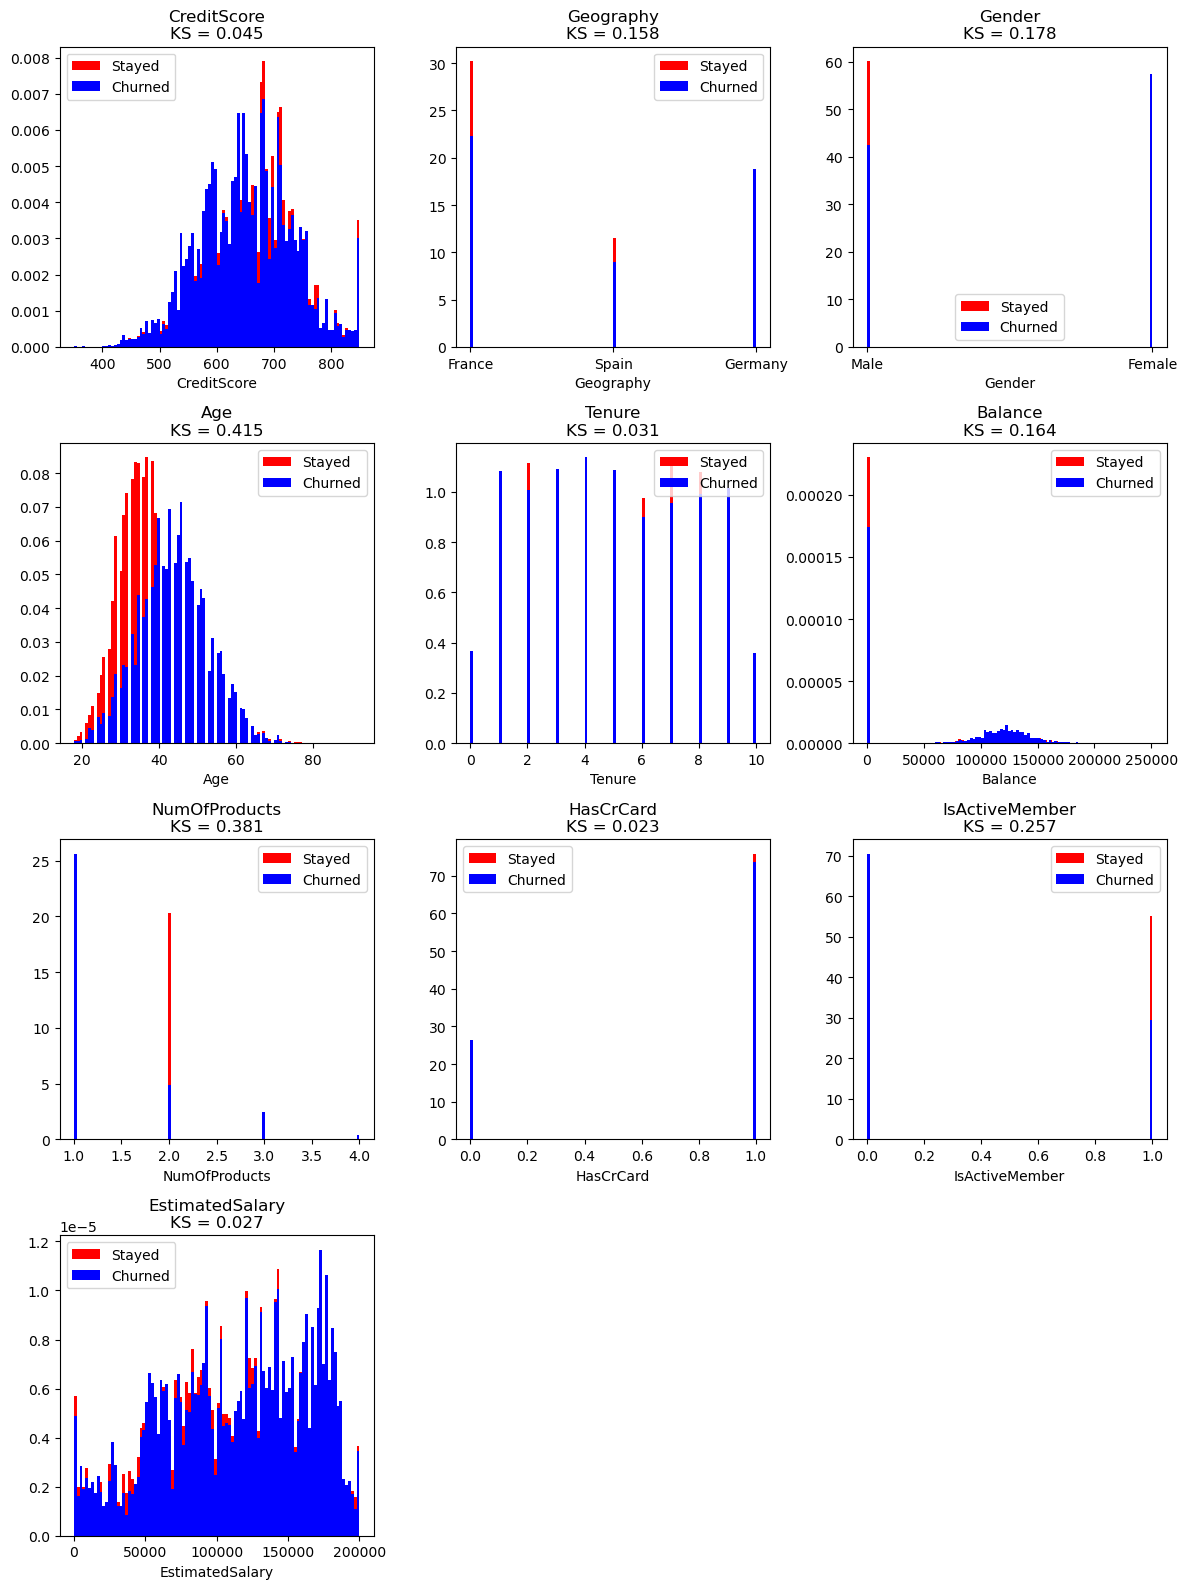

In [40]:
compare_features_binary(df)

# Cleaning 

## OneHot encode

In [43]:
df.info() #To see what neeeds to be encoded (i.e. categorical or object dtype)

<class 'pandas.core.frame.DataFrame'>
Index: 164911 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      164911 non-null  int64  
 1   Geography        164911 non-null  object 
 2   Gender           164911 non-null  object 
 3   Age              164911 non-null  float64
 4   Tenure           164911 non-null  int64  
 5   Balance          164911 non-null  float64
 6   NumOfProducts    164911 non-null  int64  
 7   HasCrCard        164911 non-null  float64
 8   IsActiveMember   164911 non-null  float64
 9   EstimatedSalary  164911 non-null  float64
 10  Exited           164911 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.1+ MB


In [44]:
#Import onehot encoder from scikit
from sklearn.preprocessing import OneHotEncoder

In [45]:
#Onehot encode categorical variables using OneHot encoder
encoder=OneHotEncoder(sparse_output=False)

en = encoder.fit_transform(df[['Geography','Gender']]) # = Categorical variables to be encoded

encoded_df = pd.DataFrame(en, columns=encoder.get_feature_names_out(['Geography', 'Gender']))#give name after encoding for easy identification

df_encoded = pd.concat([df.drop(['Geography', 'Gender'], axis=1), encoded_df], axis=1) #drop old and combine new columns into 1 df

In [46]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0,1.0,0.0,0.0,0.0,1.0
1,627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0,1.0,0.0,0.0,0.0,1.0
2,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0,1.0,0.0,0.0,0.0,1.0
3,581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0,1.0,0.0,0.0,0.0,1.0
4,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
df_encoded.info() #check if categorical var were encoded

<class 'pandas.core.frame.DataFrame'>
Index: 165033 entries, 0 to 164596
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        164911 non-null  float64
 1   Age                164911 non-null  float64
 2   Tenure             164911 non-null  float64
 3   Balance            164911 non-null  float64
 4   NumOfProducts      164911 non-null  float64
 5   HasCrCard          164911 non-null  float64
 6   IsActiveMember     164911 non-null  float64
 7   EstimatedSalary    164911 non-null  float64
 8   Exited             164911 non-null  float64
 9   Geography_France   164911 non-null  float64
 10  Geography_Germany  164911 non-null  float64
 11  Geography_Spain    164911 non-null  float64
 12  Gender_Female      164911 non-null  float64
 13  Gender_Male        164911 non-null  float64
dtypes: float64(14)
memory usage: 18.9 MB


## Standardizing/Normalizing

In [49]:
#Import scalers from scikit
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
#initializing scalers and columns to scale

scale_minmax= MinMaxScaler()
scale_standard= StandardScaler()

cols_to_scale=['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']

In [51]:
#using minmax

minmax_data = scale_minmax.fit_transform(df[cols_to_scale])
scaled_minmax_df = pd.DataFrame(minmax_data, columns=cols_to_scale)

In [52]:
#make new df combine encode + minmax

df_processed_minmax= pd.concat([scaled_minmax_df, encoded_df, df[['HasCrCard','IsActiveMember','Exited']].reset_index(drop=True)], axis=1)

In [53]:
#using standardscaler

standard_data = scale_standard.fit_transform(df[cols_to_scale])
scaled_standard_df = pd.DataFrame(standard_data, columns=cols_to_scale)

In [54]:
#make new df combine encode + standardized 

df_processed_standard=pd.concat([scaled_standard_df, encoded_df, df[['HasCrCard','IsActiveMember','Exited']].reset_index(drop=True)], axis=1)

# After Cleaning

## MinMax Scaled

In [57]:
df_processed_minmax.head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
0,0.636,0.202703,0.3,0.333333,0.000000,0.907279,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,0.554,0.202703,0.1,0.333333,0.000000,0.247483,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
2,0.656,0.297297,1.0,0.333333,0.000000,0.924364,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.462,0.216216,0.2,0.000000,0.593398,0.422787,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,0.732,0.202703,0.5,0.333333,0.000000,0.075293,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0


Number of category 0: 130002
Number of category 1: 34909
Found 13 features. Creating grid of 4 by 4
CreditScore - KS: 0.045
Age - KS: 0.415
Tenure - KS: 0.031
NumOfProducts - KS: 0.381
Balance - KS: 0.164
EstimatedSalary - KS: 0.027
Geography_France - KS: 0.158
Geography_Germany - KS: 0.210
Geography_Spain - KS: 0.052
Gender_Female - KS: 0.178
Gender_Male - KS: 0.178
HasCrCard - KS: 0.023
IsActiveMember - KS: 0.257


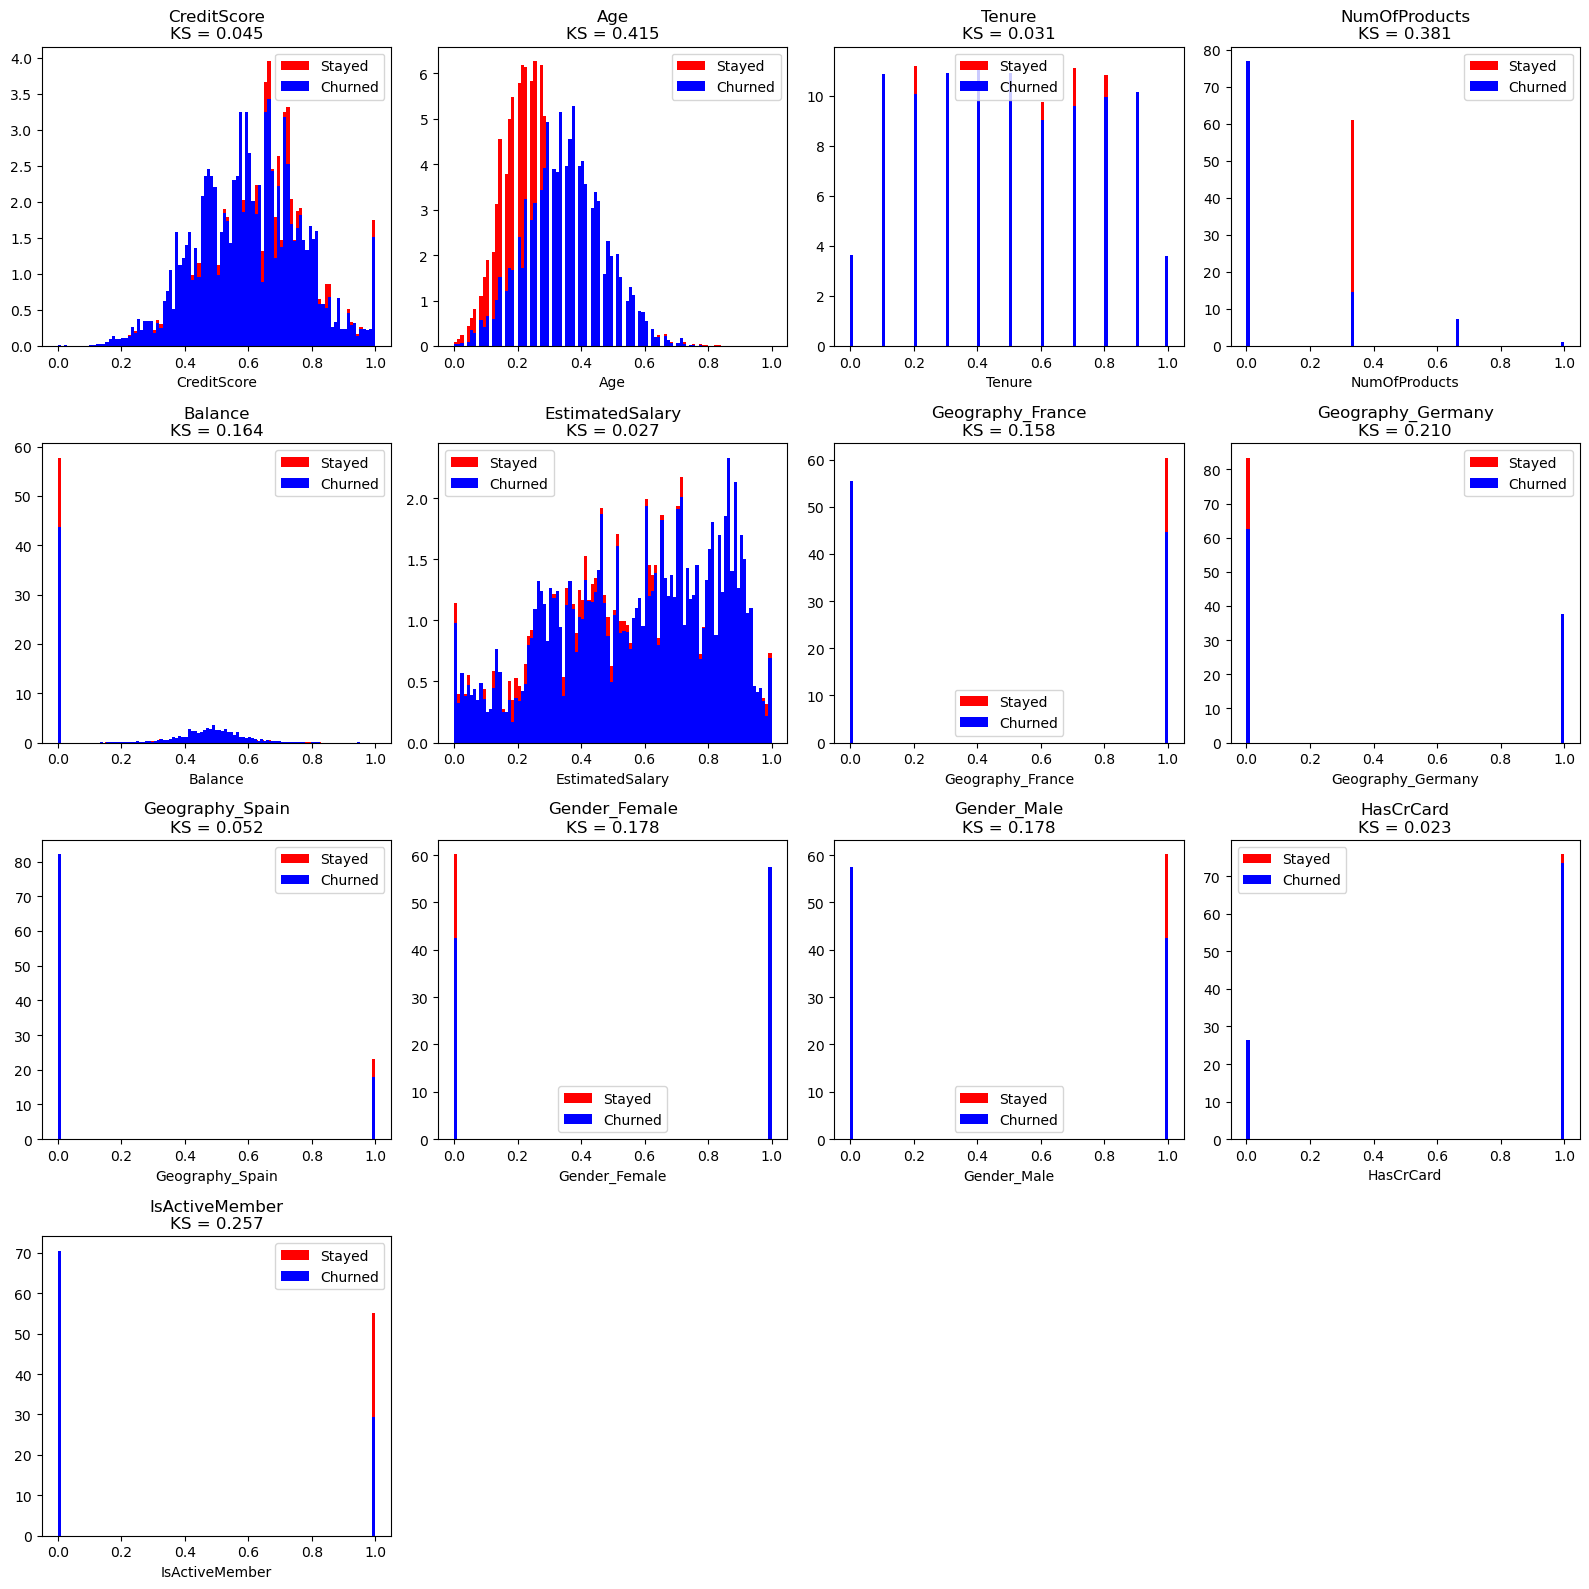

In [58]:
compare_features_binary(df_processed_minmax) #all features

Number of category 0: 130002
Number of category 1: 34909
Found 6 features. Creating grid of 3 by 2
CreditScore - KS: 0.045
Age - KS: 0.415
Tenure - KS: 0.031
NumOfProducts - KS: 0.381
Balance - KS: 0.164
EstimatedSalary - KS: 0.027


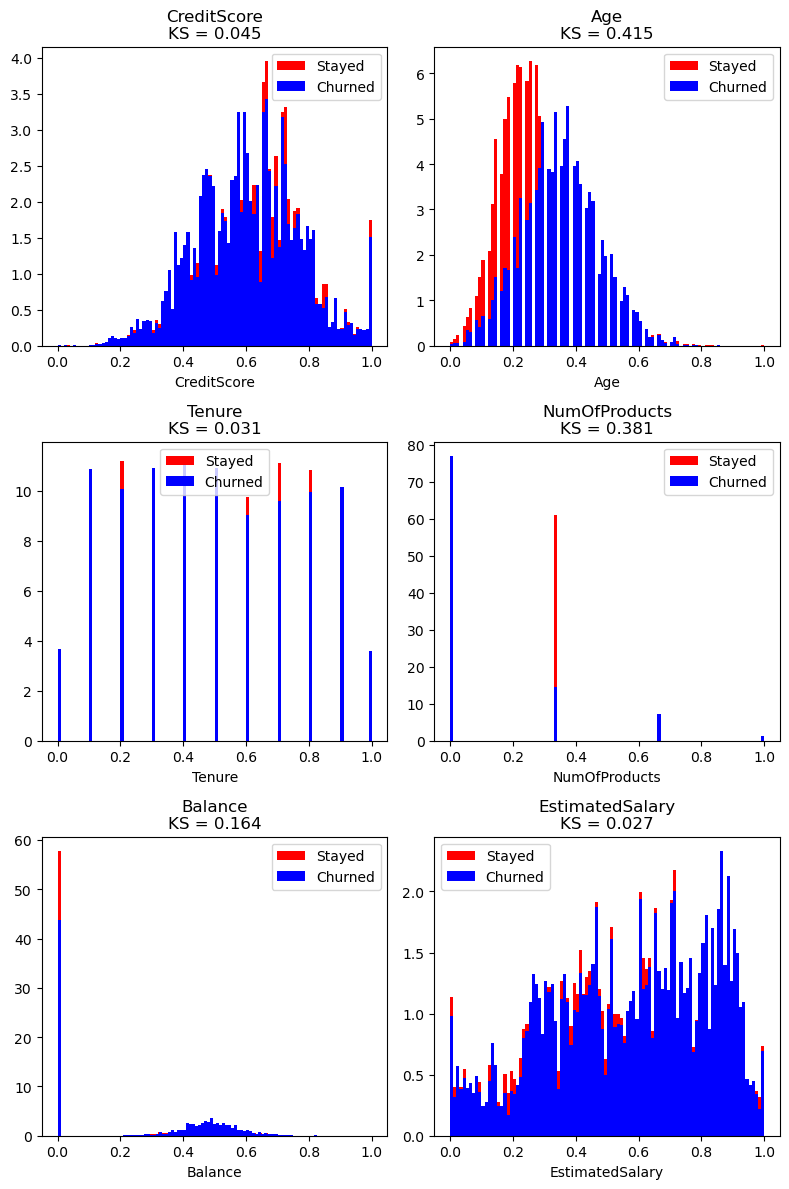

In [59]:
#numerical columns graph
compare_features_binary(df_processed_minmax, cols_to_scale)

## Standard Scaled

In [61]:
df_processed_standard.head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
0,0.143975,-0.578035,-0.720041,0.814337,-0.883190,1.369458,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,-0.367944,-0.578035,-1.432741,0.814337,-0.883190,-1.254249,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
2,0.268833,0.211588,1.774410,0.814337,-0.883190,1.437399,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,-0.942292,-0.465232,-1.076391,-1.013252,1.486833,-0.557146,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,0.743295,-0.578035,-0.007340,0.814337,-0.883190,-1.938970,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0


Number of category 0: 130002
Number of category 1: 34909
Found 13 features. Creating grid of 4 by 4
CreditScore - KS: 0.045
Age - KS: 0.415
Tenure - KS: 0.031
NumOfProducts - KS: 0.381
Balance - KS: 0.164
EstimatedSalary - KS: 0.027
Geography_France - KS: 0.158
Geography_Germany - KS: 0.210
Geography_Spain - KS: 0.052
Gender_Female - KS: 0.178
Gender_Male - KS: 0.178
HasCrCard - KS: 0.023
IsActiveMember - KS: 0.257


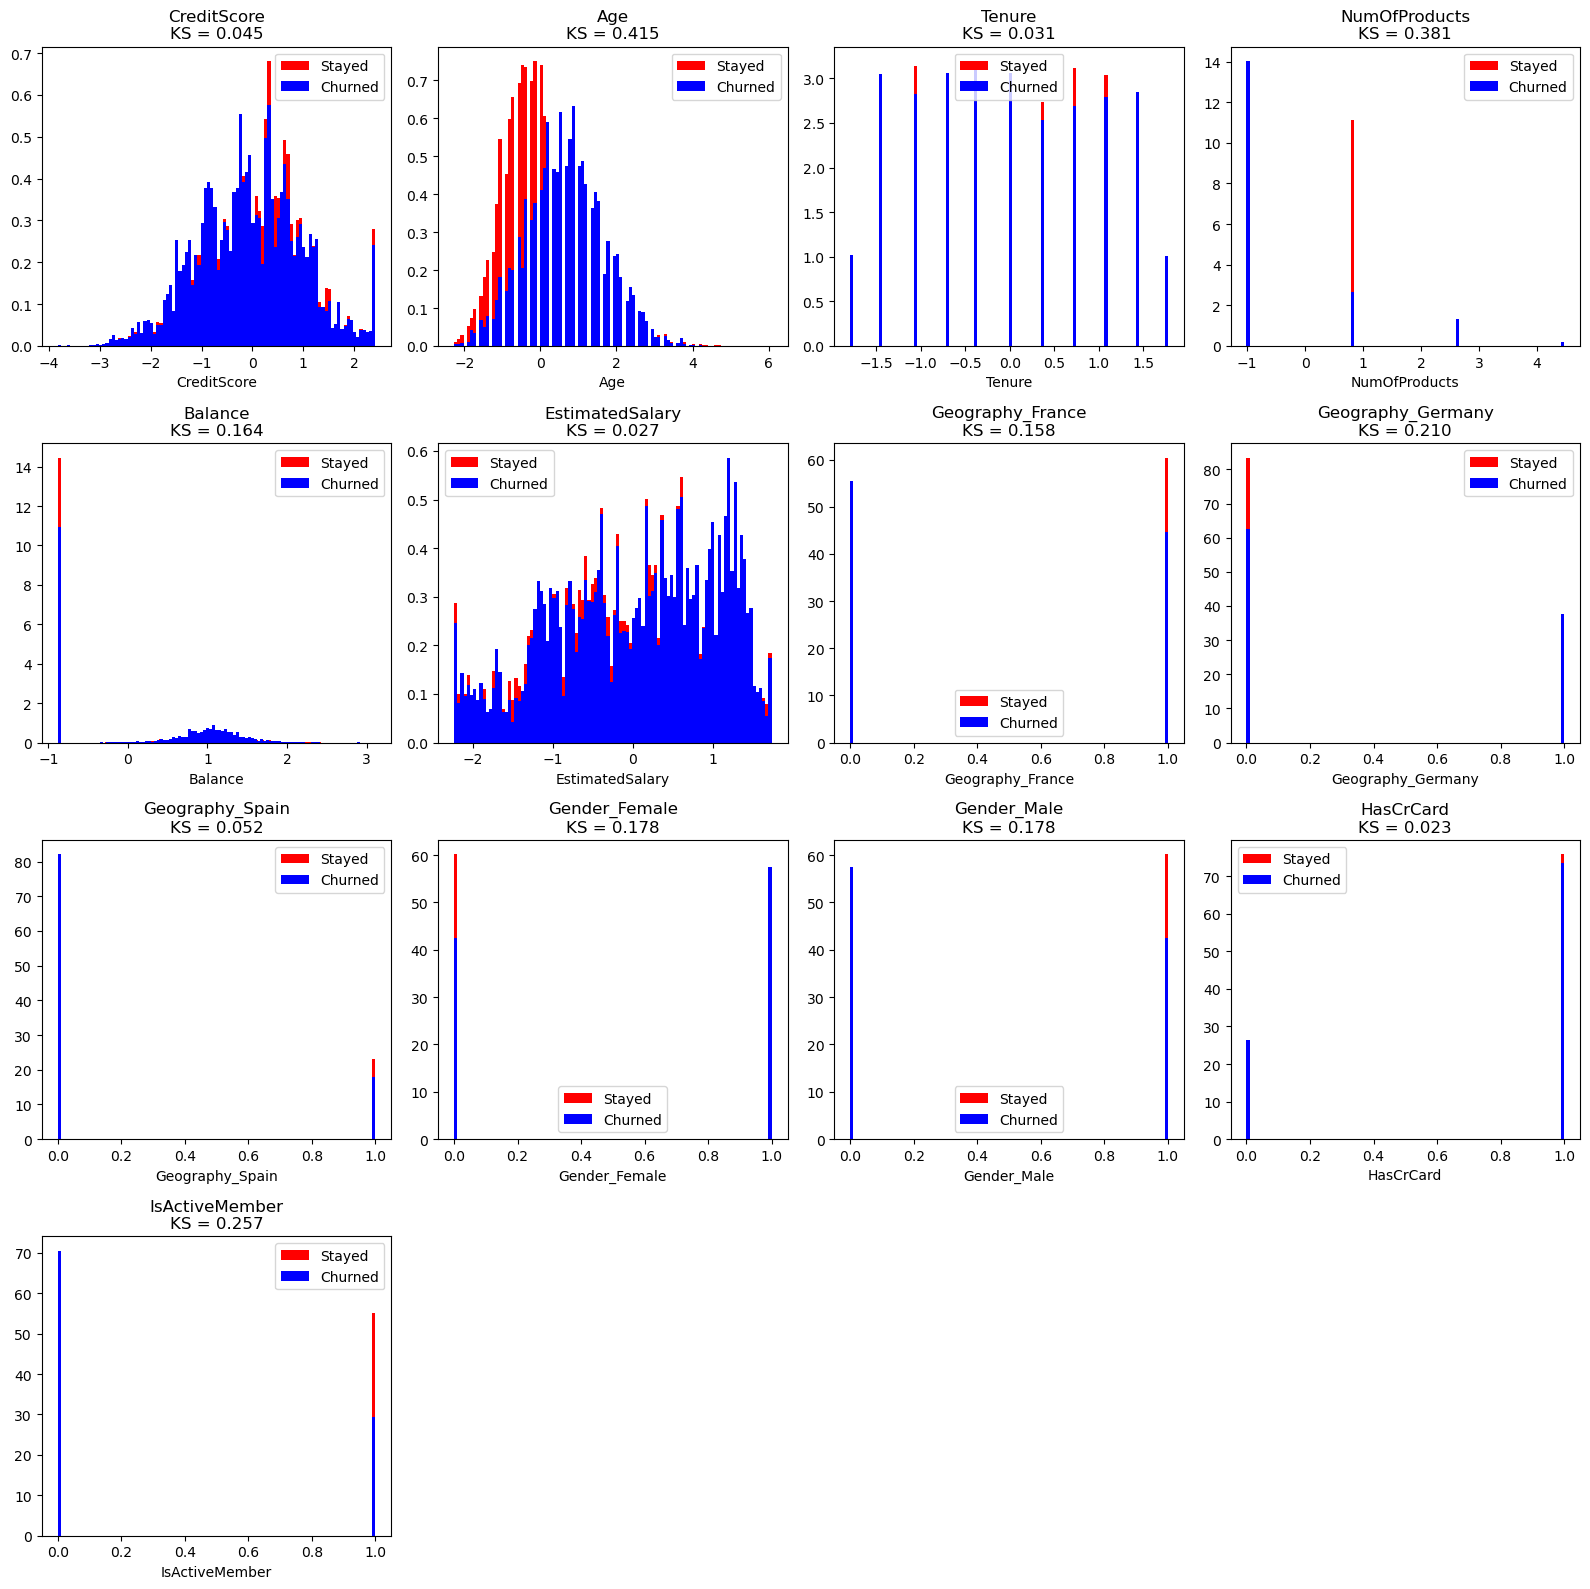

In [62]:
compare_features_binary(df_processed_standard) #all features

Number of category 0: 130002
Number of category 1: 34909
Found 6 features. Creating grid of 3 by 2
CreditScore - KS: 0.045
Age - KS: 0.415
Tenure - KS: 0.031
NumOfProducts - KS: 0.381
Balance - KS: 0.164
EstimatedSalary - KS: 0.027


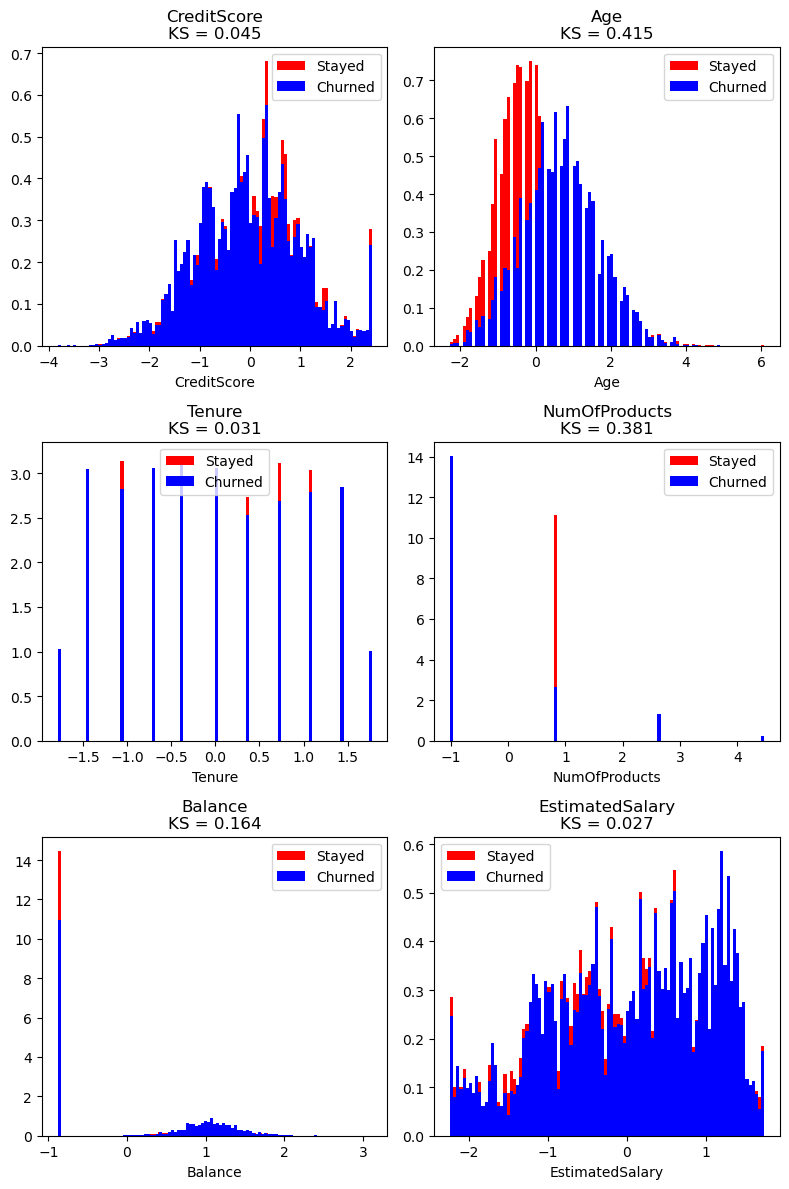

In [63]:
#numerical columns graph
compare_features_binary(df_processed_standard, cols_to_scale)

## * <b> Both MinMax and Standard Scaler gave very similar result

# Separating by Country

In [66]:
#Using Standard scaled data
france=df_processed_standard[df_processed_standard['Geography_France'] ==1].drop(['Geography_Germany', 'Geography_Spain'], axis=1)
germany= df_processed_standard[df_processed_standard['Geography_Germany']==1].drop(['Geography_France', 'Geography_Spain'], axis=1)
spain=df_processed_standard[df_processed_standard['Geography_Spain']==1].drop(['Geography_Germany', 'Geography_France'], axis=1)

## France

In [68]:
france.head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary,Geography_France,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
0,0.143975,-0.578035,-0.720041,0.814337,-0.883190,1.369458,1.0,0.0,1.0,1.0,0.0,0
1,-0.367944,-0.578035,-1.432741,0.814337,-0.883190,-1.254249,1.0,0.0,1.0,1.0,1.0,0
2,0.268833,0.211588,1.774410,0.814337,-0.883190,1.437399,1.0,0.0,1.0,1.0,0.0,0
3,-0.942292,-0.465232,-1.076391,-1.013252,1.486833,-0.557146,1.0,0.0,1.0,1.0,1.0,0
6,-0.792462,-0.916445,1.061710,-1.013252,1.421409,-1.646203,1.0,1.0,0.0,1.0,0.0,0


Number of category 0: 78562
Number of category 1: 15570
Found 11 features. Creating grid of 4 by 3
CreditScore - KS: 0.049
Age - KS: 0.411
Tenure - KS: 0.029
NumOfProducts - KS: 0.400
Balance - KS: 0.024
EstimatedSalary - KS: 0.027
Geography_France - KS: 0.000
Gender_Female - KS: 0.184
Gender_Male - KS: 0.184
HasCrCard - KS: 0.029
IsActiveMember - KS: 0.252


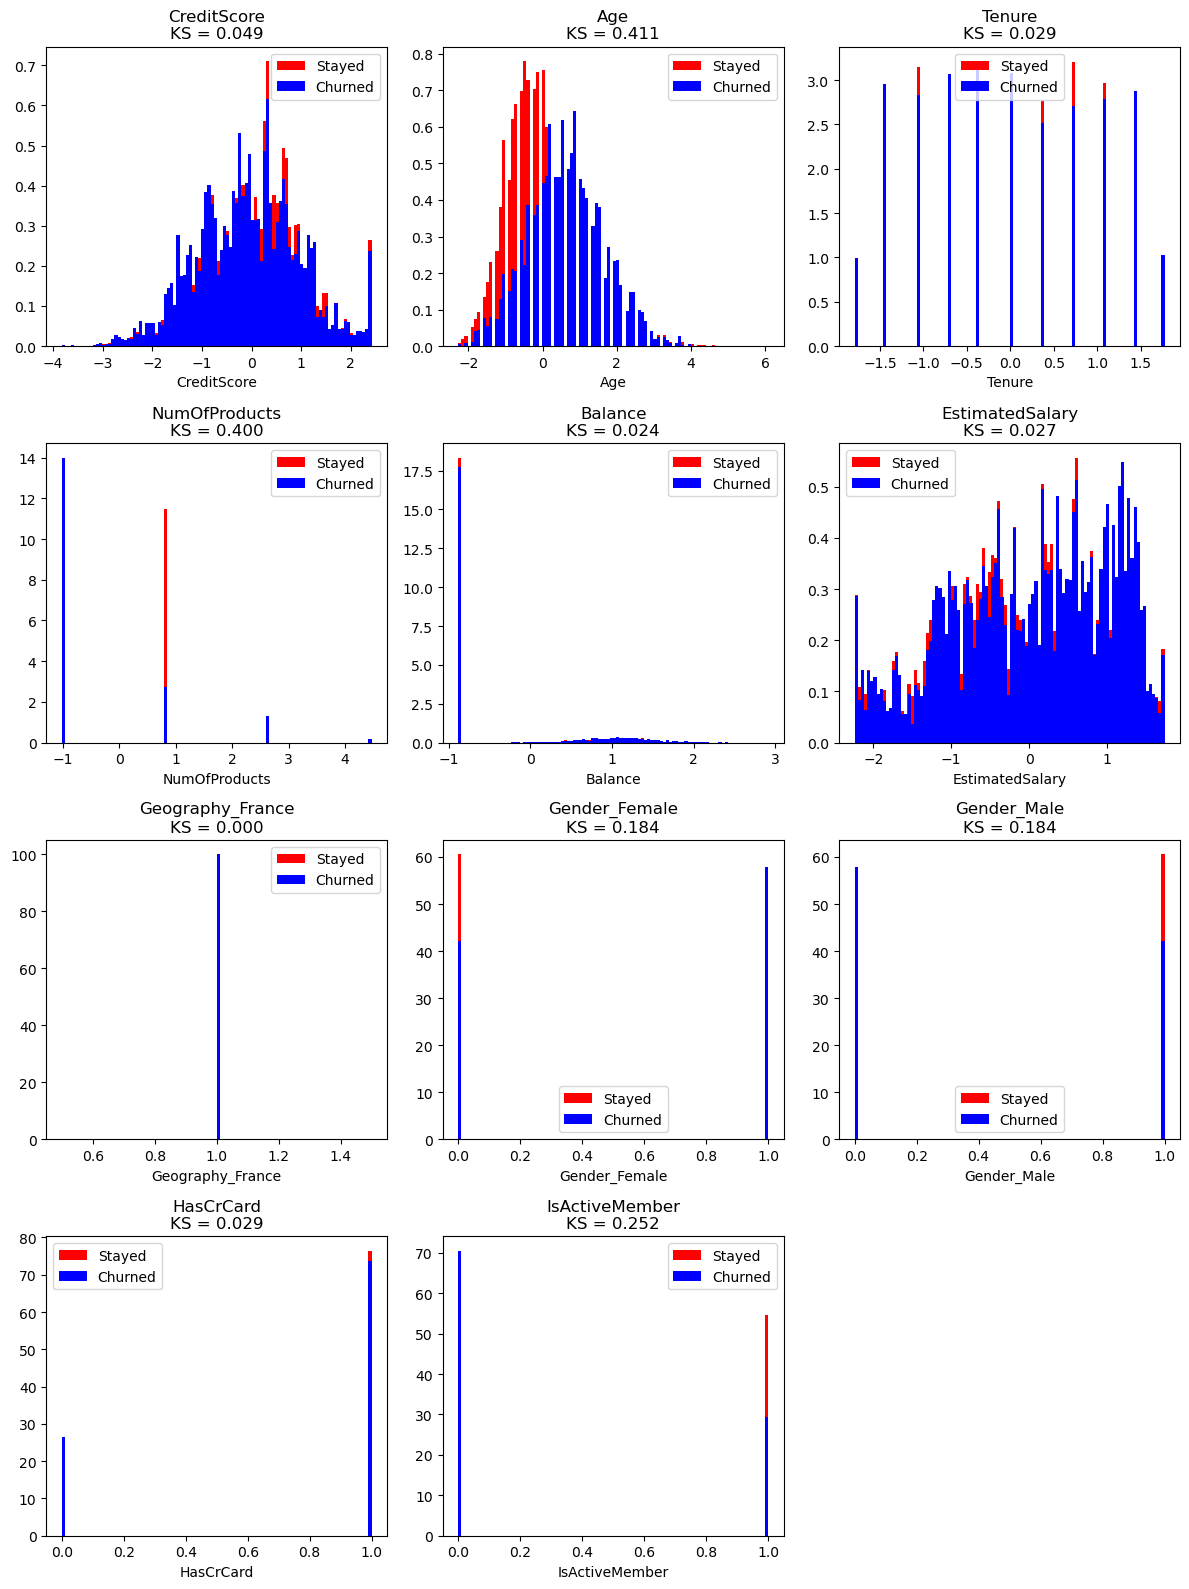

In [69]:
compare_features_binary(france) #All features graph for france only

## Spain

In [71]:
spain.head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
4,0.743295,-0.578035,-0.007340,0.814337,-0.88319,-1.938970,1.0,0.0,1.0,1.0,1.0,0
7,0.268833,-0.126822,-1.432741,-1.013252,1.32118,-0.113903,1.0,0.0,1.0,1.0,0.0,0
12,1.280185,3.708488,1.418060,-1.013252,-0.88319,-0.387709,1.0,0.0,1.0,1.0,1.0,0
20,1.454987,-0.352429,1.418060,0.814337,-0.88319,-0.497721,1.0,0.0,1.0,0.0,1.0,0
25,0.580979,0.098784,1.418060,-1.013252,-0.88319,0.373509,1.0,0.0,1.0,1.0,0.0,1


Number of category 0: 29959
Number of category 1: 6233
Found 11 features. Creating grid of 4 by 3
CreditScore - KS: 0.047
Age - KS: 0.398
Tenure - KS: 0.035
NumOfProducts - KS: 0.373
Balance - KS: 0.041
EstimatedSalary - KS: 0.026
Geography_Spain - KS: 0.000
Gender_Female - KS: 0.162
Gender_Male - KS: 0.162
HasCrCard - KS: 0.035
IsActiveMember - KS: 0.258


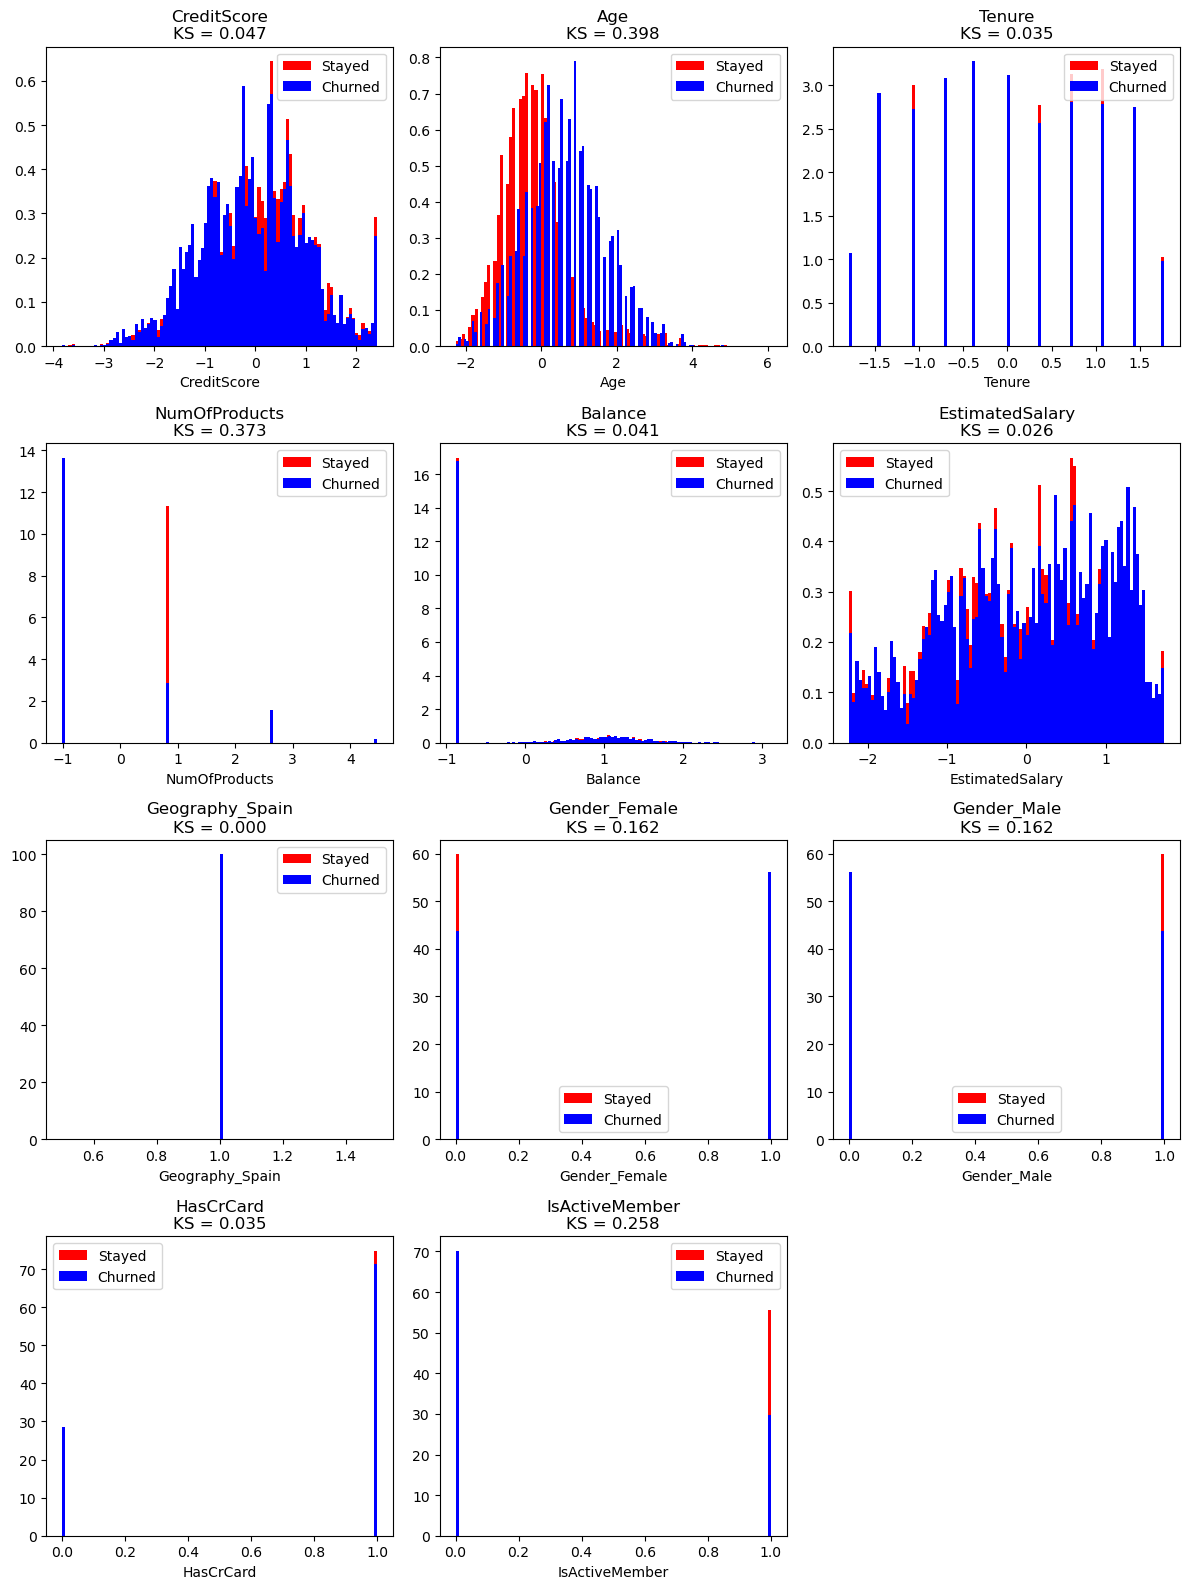

In [72]:
compare_features_binary(spain) #All features graph for spain only

## Germany

In [74]:
germany.head()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary,Geography_Germany,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
5,-0.854891,-0.239625,-0.363691,-1.013252,1.214559,0.466186,1.0,0.0,1.0,1.0,0.0,1
9,-0.917320,0.211588,-0.363691,-1.013252,0.410595,1.158544,1.0,0.0,1.0,1.0,1.0,0
10,-0.717547,-1.254855,0.349010,0.814337,1.692486,-0.067519,1.0,1.0,0.0,1.0,0.0,0
11,0.381206,0.211588,-0.720041,-1.013252,0.556388,-2.205264,1.0,0.0,1.0,1.0,0.0,0
18,-0.143199,1.903636,1.061710,-1.013252,1.028737,0.248627,1.0,1.0,0.0,1.0,0.0,1


Number of category 0: 21481
Number of category 1: 13106
Found 11 features. Creating grid of 4 by 3
CreditScore - KS: 0.038
Age - KS: 0.409
Tenure - KS: 0.028
NumOfProducts - KS: 0.298
Balance - KS: 0.057
EstimatedSalary - KS: 0.026
Geography_Germany - KS: 0.000
Gender_Female - KS: 0.170
Gender_Male - KS: 0.170
HasCrCard - KS: 0.006
IsActiveMember - KS: 0.272


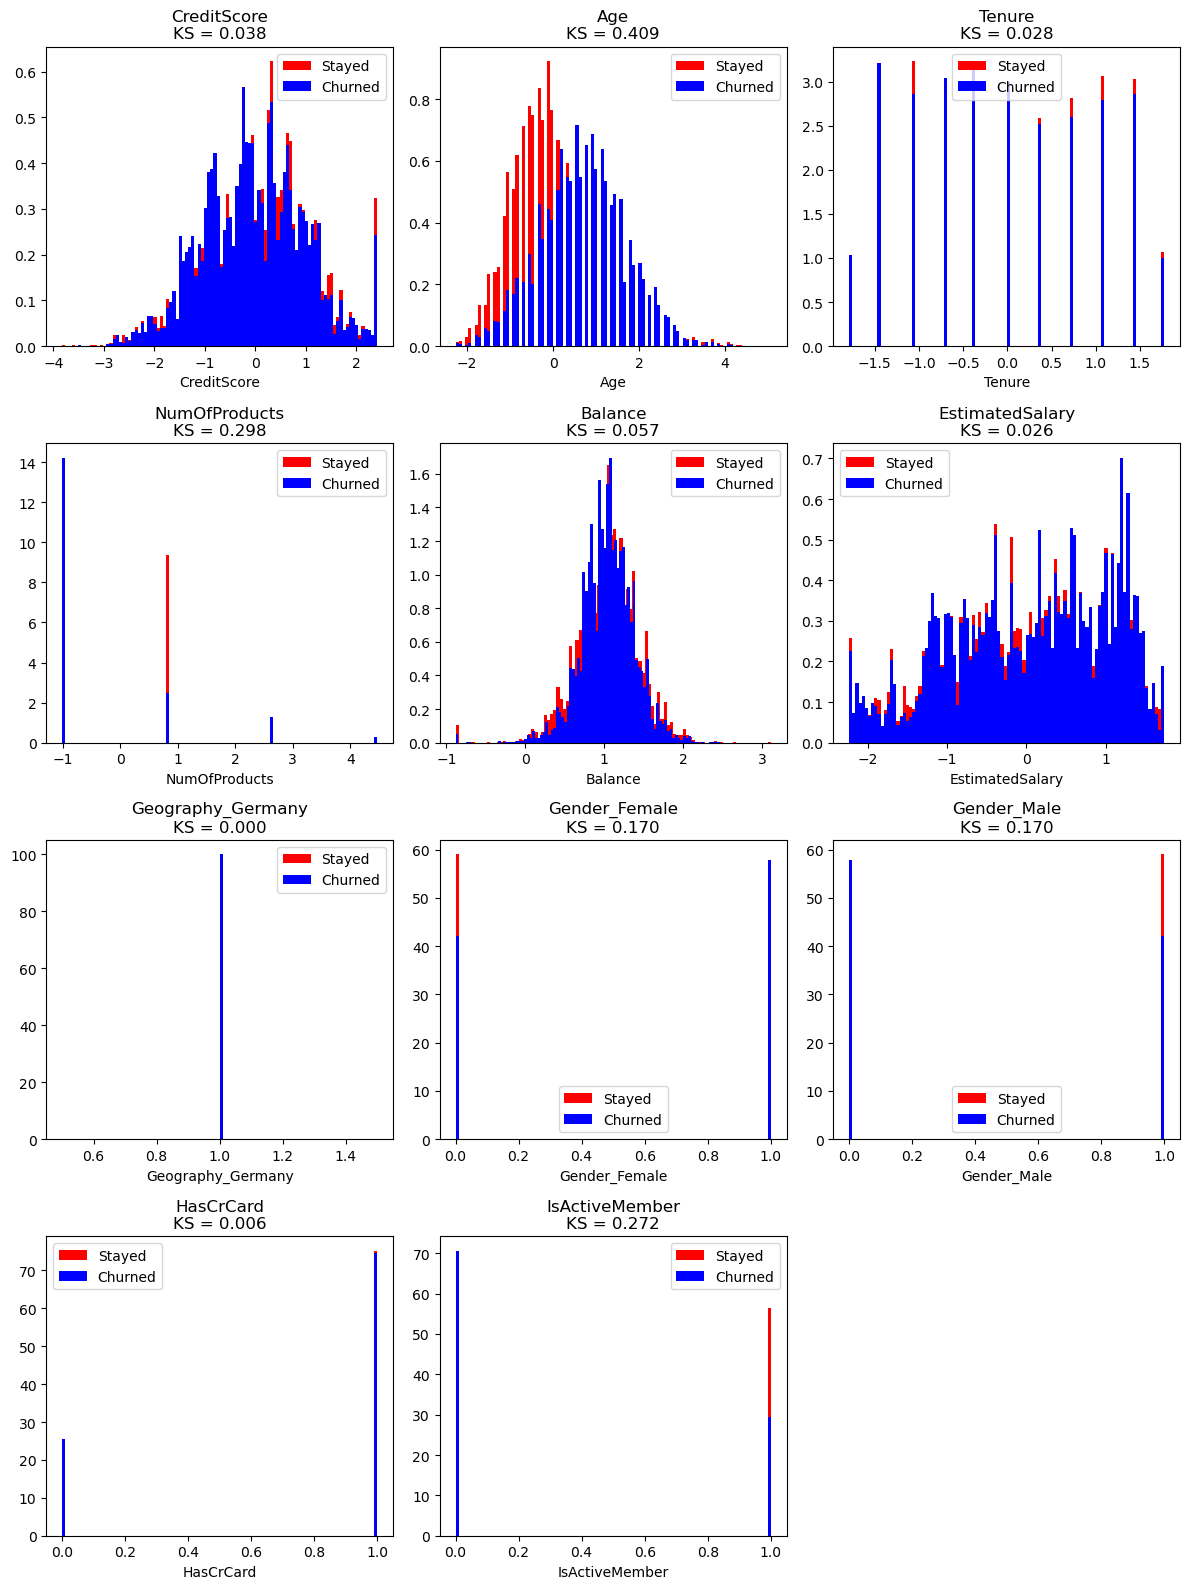

In [75]:
compare_features_binary(germany) #All features graph for germany only

## * <b> There are slight differences between countries but nothing particularly stood out. Age is still the best predictor.

# Remove Outlier

In [78]:
#To drop outliers
def drop_outliers_multiple_columns(df, columns):
    df_filtered = df.copy()
    
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            before = len(df_filtered)
            df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
            after = len(df_filtered)

            print(f"Removed {before - after} outliers from column '{col}'")
        else:
            print(f"Skipped non-numeric column: {col}")
    
    return df_filtered


In [79]:
cols_to_clean = ['CreditScore', 'Age', 'NumOfProducts'] #identified in prev notebook - Data_visualization
df_cleaned = drop_outliers_multiple_columns(df, cols_to_clean)

Removed 252 outliers from column 'CreditScore'
Removed 6369 outliers from column 'Age'
Removed 434 outliers from column 'NumOfProducts'


Number of category 0: 125827
Number of category 1: 32029
Found 10 features. Creating grid of 4 by 3
CreditScore - KS: 0.045
Geography - KS: 0.158
Gender - KS: 0.178
Age - KS: 0.414
Tenure - KS: 0.032
Balance - KS: 0.163
NumOfProducts - KS: 0.391
HasCrCard - KS: 0.023
IsActiveMember - KS: 0.256
EstimatedSalary - KS: 0.027


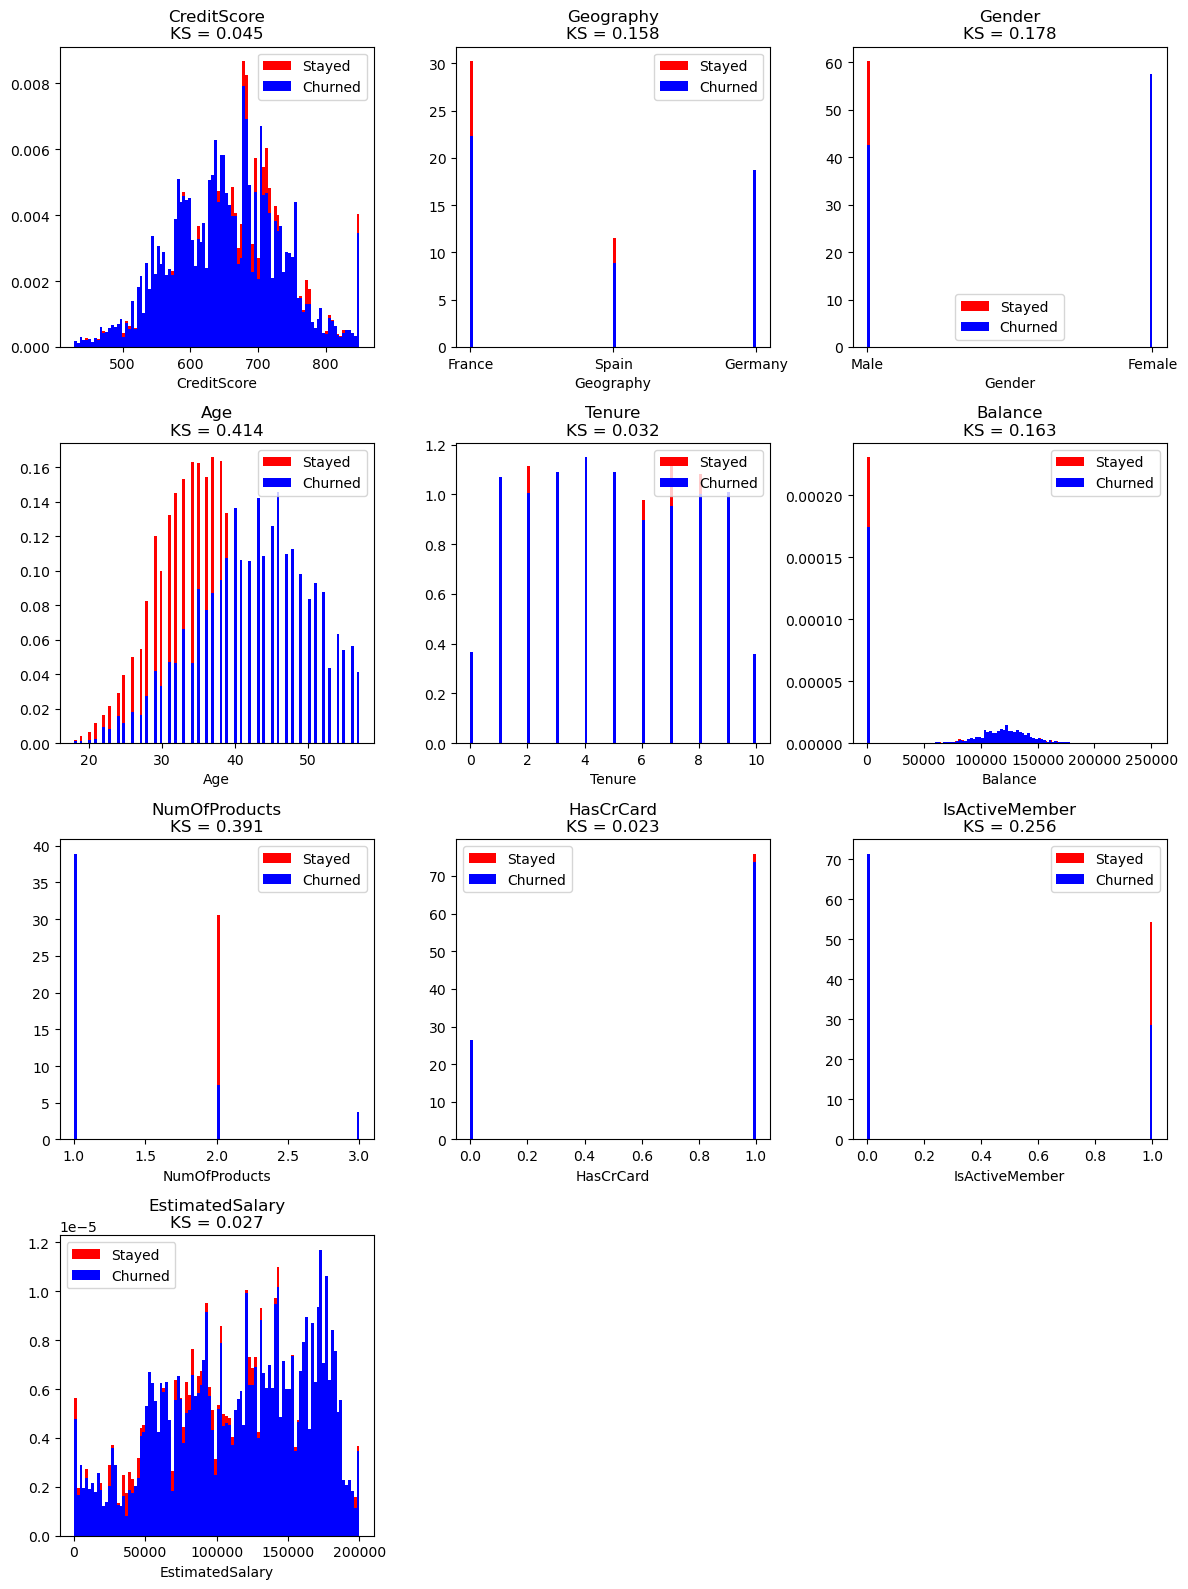

In [80]:
compare_features_binary(df_cleaned) #Graph after removing outliers

## * <b> There doesn't seem to be a significant difference after removing outliers.